In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from google.colab import drive
# drive.mount("/content/drive")

No rows with missing data were removed.


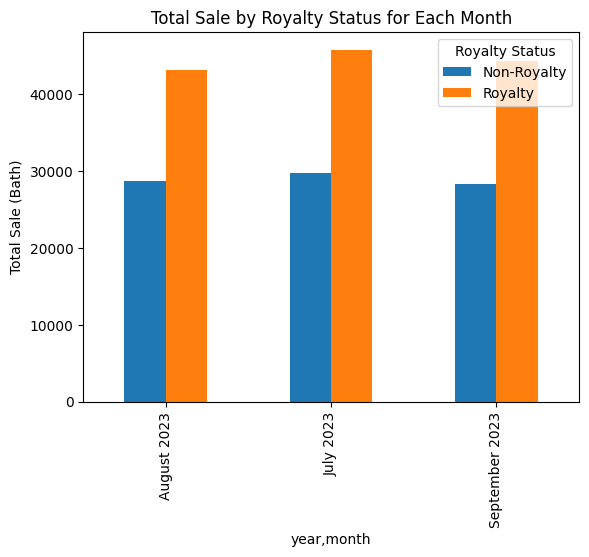

In [8]:
# ---
# Group No. 6
# 1. พิมมาดา แก้วรอด 6410450541
# 2. อภิชญา สุธีระกุล 6410450630
# 3.  ภาณุพันธ์ สุวรรณชาติ 6410451806
# 4. ศุภสุตา คะเช็นแก้ว 6410451873
# ---

group = 6 #
problem = 6 # ปัญหาที่
data_num = 5 # ชุดข้อมูลที่

# ชุดข้อมูลเก็บใน /in
in_path = "./dataset/P"+str(problem)+"/in/"
data_path = in_path+"p"+str(problem)+"_input_dataset_"+str(data_num)+".csv"

# ผลลัพธ์เก็บใน /out
out_path = "./dataset/P"+str(problem)+"/out/"
result_path = out_path+"p"+str(problem)+"_group"+str(group)+"-output"+str(data_num)+".csv"
png_path = out_path+"p"+str(problem)+"_group"+str(group)+"-plot"+str(data_num)+".png"

# อ่านข้อมูล
df = pd.read_csv(data_path)

# --- เริ่มเขียนโค้ดตรงนี้ ---
# Check for missing data
missing_data = df.isnull().sum()

# Remove rows with missing data
df_cleaned = df.dropna()

# Check if any rows were removed
if len(df_cleaned) < len(df):
    print(f'Removed {len(df) - len(df_cleaned)} rows with missing data.')
else:
    print('No rows with missing data were removed.')

# You can now work with the 'df_cleaned' DataFrame, which contains the data without missing values.

#Concatenate column
df_cleaned['datetime'] = df_cleaned['date'] + ' ' + df_cleaned['time']
#Convert to datetime object
df_cleaned['datetime'] = pd.to_datetime(df_cleaned['datetime'])
#Extract year from datetime
df_cleaned['year'] = df_cleaned['datetime'].apply(lambda x: x.year)
#Extract month from datetime
df_cleaned['month'] = df_cleaned['datetime'].apply(lambda x: x.month)

#Remove all white space from column.
df_cleaned['royalty_number'] = df_cleaned['royalty_number'].str.strip()
#Check the customer have a royalty number or not.
df_cleaned['royalty_number'] = df_cleaned['royalty_number'].apply(lambda x: True if x != '' else False)
#Create a new dataframe by select the expect column and groupby.
df_out = df_cleaned[['year', 'month', 'royalty_number', 'total_sale']].groupby(['year', 'month', 'royalty_number']).sum()
#Reset index
df_out = df_out.reset_index()
#Create a new dataframe to plot
df_plot = df_cleaned[['datetime', 'year', 'royalty_number', 'total_sale']].copy()
#Create a Royalty Status
df_plot['Royalty Status'] = df_plot['royalty_number'].apply(lambda x: 'Royalty' if x else 'Non-Royalty')
#Create month name column
df_plot['month'] = df_plot['datetime'].apply(lambda x: x.strftime("%B"))
#Change year to string
df_plot['year'] = df_plot['year'].apply(lambda x: str(x))
#Concatenate month name and year
df_plot['year,month'] = df_plot['month'] + ' ' + df_plot['year']
#Create a plot
ax = df_plot.groupby(['year,month', 'royalty_number']).sum(numeric_only=True).unstack('royalty_number').plot.bar()
#Add title and labels
plt.title('Total Sale by Royalty Status for Each Month')
plt.ylabel('Total Sale (Bath)')
#Add legend
ax.legend(['Non-Royalty', 'Royalty'])
ax.get_legend().set_title("Royalty Status")



# --- สิ้นสุดโค้ดตรงนี้ ---

# เซฟผลลัพธ์
df.to_csv(result_path, index=False)

# แสดงผลลัพธ์
df.head()

# เซฟกราฟ
plt.savefig(png_path, dpi=100)

# แสดงผลกราฟ
plt.show()